##Purchase data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\DATA SCIENCE\\Kaholas assignment\\purchase_data.csv",encoding='latin-1')
df.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [3]:
df.shape

(1000, 5)

In [4]:
df.isnull()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [5]:
df.isnull().sum()

Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64

In [6]:
df.isnull().any()

Purchase_ID           False
User_ID               False
Product_ID            False
Transaction_Amount    False
Purchase_Time         False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [8]:
df.describe()

,Transaction_Amount
count,1000.000000
mean,106.348744
std,55.951244
min,10.429825
25%,58.426058
50%,102.950857
75%,157.533495
max,199.961345


In [9]:
df.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [10]:
# Calculate the total number of visits or interactions
total_interactions = df.shape[0]

In [11]:
total_interactions

1000

In [12]:
# Calculate the number of successful purchases
successful_purchases = df[df['Transaction_Amount'] > 0].shape[0]

In [13]:
successful_purchases

1000

In [14]:
# Calculate the overall conversion rate
conversion_rate = successful_purchases / total_interactions

In [15]:
conversion_rate

1.0

In [16]:
# Display the overall conversion rate
print("Overall Conversion Rate: {:.2%}".format(conversion_rate))

Overall Conversion Rate: 100.00%


In [17]:
df.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [18]:
# Calculate the top-selling products
top_selling_products = df.groupby('Product_ID')['Transaction_Amount'].sum().nlargest(10)


In [19]:
top_selling_products 

Product_ID
Product_19    7125.056901
Product_17    6711.316153
Product_13    6680.243756
Product_3     6375.983900
Product_20    6359.302691
Product_8     5780.766674
Product_5     5697.714155
Product_4     5581.543749
Product_7     5369.148281
Product_12    5363.519340
Name: Transaction_Amount, dtype: float64

In [20]:
# Calculate the top-selling product categories
product_data = df.groupby('Product_ID').first()  # Assuming 'Product_ID' uniquely represents a product


In [21]:
product_data.head()

,Purchase_ID,User_ID,Transaction_Amount,Purchase_Time
Product_ID,,,,
Product_1,Purchase_36,User_2129,156.652541,2023-02-22 09:06:30
Product_10,Purchase_53,User_62,27.214051,2023-03-23 02:06:05
Product_11,Purchase_613,User_691,104.729904,2023-06-19 08:35:13
Product_12,Purchase_599,User_3228,46.880509,2023-03-22 01:31:48
Product_13,Purchase_947,User_2178,121.514207,2023-04-19 23:01:15


In [22]:
top_selling_categories = product_data.groupby('Product_ID')['Transaction_Amount'].sum().nlargest(5)


In [23]:
top_selling_categories

Product_ID
Product_18    181.501507
Product_2     164.012789
Product_4     163.417772
Product_7     162.569998
Product_1     156.652541
Name: Transaction_Amount, dtype: float64

In [24]:
# Display the top-selling products and product categories
print("Top-Selling Products:")
print(top_selling_products)

Top-Selling Products:
Product_ID
Product_19    7125.056901
Product_17    6711.316153
Product_13    6680.243756
Product_3     6375.983900
Product_20    6359.302691
Product_8     5780.766674
Product_5     5697.714155
Product_4     5581.543749
Product_7     5369.148281
Product_12    5363.519340
Name: Transaction_Amount, dtype: float64


In [25]:
print("\nTop-Selling Product Categories:")
print(top_selling_categories)


Top-Selling Product Categories:
Product_ID
Product_18    181.501507
Product_2     164.012789
Product_4     163.417772
Product_7     162.569998
Product_1     156.652541
Name: Transaction_Amount, dtype: float64


In [26]:
# Calculate the number of interactions for each user
interactions_per_user = df['User_ID'].value_counts()


In [27]:
interactions_per_user

User_556     3
User_1700    3
User_4872    3
User_1277    3
User_1075    3
            ..
User_3719    1
User_733     1
User_1462    1
User_1922    1
User_3364    1
Name: User_ID, Length: 916, dtype: int64

In [28]:
# Filter the dataset to include only successful purchases
successful_purchases = df[df['Transaction_Amount'] > 0]

In [29]:
successful_purchases.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [30]:
# Calculate the number of interactions for users who made a purchase
interactions_per_user_purchased = successful_purchases['User_ID'].value_counts()


In [31]:
interactions_per_user_purchased

User_556     3
User_1700    3
User_4872    3
User_1277    3
User_1075    3
            ..
User_3719    1
User_733     1
User_1462    1
User_1922    1
User_3364    1
Name: User_ID, Length: 916, dtype: int64

In [32]:
# Calculate the likelihood of a purchase based on the number of interactions
likelihood_of_purchase = interactions_per_user_purchased / interactions_per_user


In [33]:
likelihood_of_purchase

User_556     1.0
User_1700    1.0
User_4872    1.0
User_1277    1.0
User_1075    1.0
            ... 
User_3719    1.0
User_733     1.0
User_1462    1.0
User_1922    1.0
User_3364    1.0
Name: User_ID, Length: 916, dtype: float64

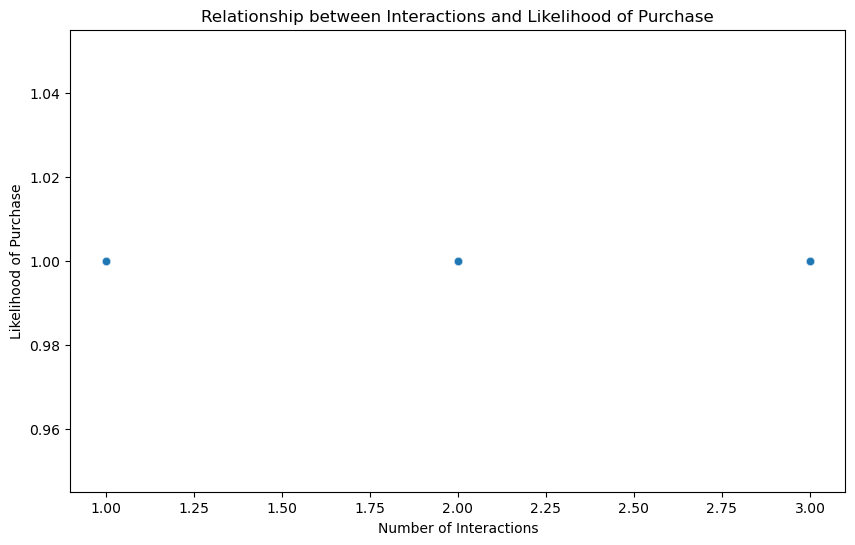

In [34]:
# Plot the relationship between interactions and the likelihood of a purchase
plt.figure(figsize=(10, 6))
sns.scatterplot(x=interactions_per_user, y=likelihood_of_purchase, alpha=0.6)
plt.title('Relationship between Interactions and Likelihood of Purchase')
plt.xlabel('Number of Interactions')
plt.ylabel('Likelihood of Purchase')
plt.show()

In [35]:
df.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [54]:
# Convert the "Purchase_Time" column to datetime
df['Purchase_Time'] = pd.to_datetime(df['Purchase_Time'])


In [55]:
df['Purchase_Time']

0     2023-04-02 16:35:46
1     2023-04-14 16:38:27
2     2023-01-21 11:21:31
3     2023-01-29 04:44:04
4     2023-05-24 03:30:23
              ...        
995   2023-04-10 17:38:54
996   2023-02-19 15:05:57
997   2023-07-14 23:15:18
998   2023-03-03 15:37:35
999   2023-02-18 17:47:48
Name: Purchase_Time, Length: 1000, dtype: datetime64[ns]

In [56]:
# Calculate the total transaction amount for each user
total_transaction_amount = df.groupby('User_ID')['Transaction_Amount'].sum()


In [57]:
total_transaction_amount

User_ID
2        53.694989
3       184.153247
32       45.552579
35      197.985369
37       61.549329
           ...    
4981    158.496550
4989    192.499949
4993     58.427015
4995     20.836426
4999     47.968517
Name: Transaction_Amount, Length: 916, dtype: float64

In [58]:
# Calculate the number of unique users acquired during different time periods
users_acquired_per_period = df.groupby(df['Purchase_Time'].dt.to_period('M'))['User_ID'].nunique()


In [59]:
users_acquired_per_period

Purchase_Time
2023-01    152
2023-02    129
2023-03    152
2023-04    144
2023-05    135
2023-06    137
2023-07    133
Freq: M, Name: User_ID, dtype: int64

In [60]:
# Calculate the LTV for each time period
ltv_per_period = total_transaction_amount / users_acquired_per_period

In [61]:
# Use the 'where' method to handle zero values in users_acquired_per_period
ltv_per_period = ltv_per_period.where(users_acquired_per_period != 0, 0)

In [62]:
# Display the LTV for each time period
print("Lifetime Value (LTV) per Time Period:")
print(ltv_per_period)

Lifetime Value (LTV) per Time Period:
2          0.0
3          0.0
32         0.0
35         0.0
37         0.0
          ... 
2023-03    NaN
2023-04    NaN
2023-05    NaN
2023-06    NaN
2023-07    NaN
Length: 923, dtype: float64
